# 1D Ising chain  

$$\sigma_i = \pm 1$$

$$\mathcal{Z} = \sum_{\{ \sigma \}}
\exp{[-\beta \mathcal{H}]}
$$

Free energy: 

$$ F = \frac{-1}{\beta} \ln{\mathcal{Z}} $$


Entropy: 

$$ S = - \sum_{ \{ \sigma \}} p(\sigma) \log{p(\sigma)} = 
- \beta \partial_{\beta} (\log{\mathcal{Z}}) + \log{\mathcal{Z}}$$

### Open boundary conditions

$$ \mathcal{H} = - J \sum_{i=1}^{L-1} \sigma_i \sigma_{i+1} - h \sum_i \sigma_i$$

Transfer matrices 
$T_1 = \begin{pmatrix}
e^{K} &  e^{-K}\\
e^{-K}  & e^{K}
\end{pmatrix} 
$, with $K = \beta J $,
and 
$T_2 = \begin{pmatrix}
e^{\tilde{h}} & 0\\
0 & e^{-\tilde{h}}
\end{pmatrix} 
$, with $\tilde{h} = \beta h $, 
give the partition function 

$$\mathcal{Z}(K,\tilde{h}) = Tr(V (T_1 T_2)^{L-1})$$

with $V = 
\begin{pmatrix}
e^{\tilde{h}} & e^{-\tilde{h}}\\
e^{\tilde{h}} & e^{-\tilde{h}}
\end{pmatrix} 
$, such that

$$ \mathcal{Z}(K,0) = 2 (2 \cosh{(K)})^{L-1} $$

The two-point correlation function in the absence of magnetic field is given by 

$$ 
\langle \sigma_i \sigma_j \rangle = \frac{1}{\mathcal{Z}} 
Tr(
W T^{L-j} \sigma^z T^{j-i} \sigma^z T^{i-1}
)
=
e^{KL} \cosh{(K)}^{i-j+L} (e^{K} \cosh{(K)})^{-L} \sinh{(K)}^{-i+j}
$$
with $W =
\begin{pmatrix}
1 & 1\\
1& 1
\end{pmatrix} 
$ and $j>i$.


### Periodic boundary conditions

Subir Sachdev book of quantum phase transitions, chapter 2.

$$ \mathcal{H} = - K \sum_{i=1}^{L} \sigma_i \sigma_{i+1} - \tilde{h} \sum_{i=1}^{L} \sigma_i,
\quad K  = \beta J, \; \tilde{h} = \beta h$$


$$ \mathcal{Z} = \epsilon_1^L + \epsilon_2^L $$

$$ \epsilon_{1,2} = e^K \cosh{\tilde{h}} \pm (e^{2K} \sinh^2{\tilde{h}} + e^{-2K})^{1/2} $$



Bibliography about Variational Neural Annealing: https://arxiv.org/pdf/2101.10154.pdf


In [1]:
import tensorflow as tf
import importlib
import VNA; importlib.reload(VNA) # to be able to modify f.py and use the new version of the file
from VNA import Annealing

import numpy as np
import os, sys
import time

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})

# Definitions

In [2]:
# RNN hyperparameters
N_sites = 50 # In time series data context, this is the number of time steps
N_samples = int(3E3)
memory_units = 128
activation_function = tf.keras.activations.elu

# Annealing hyperparameters
N_warm_up = 200 # 150
N_train = 150 # 150
lr_warm_up = 5E-3
lr_annealing = 5E-3
T0 = 3. # 2.
delta_T = 0.1
T_final = .1

# Folder where models are saved
modelsfolder = '/home/s/Dropbox/RNN/VNA/models/'
modelsfolder += 'L' + str(N_sites) + '/'

# Folder where results are saved
resultsfolder = '/home/s/Dropbox/RNN/VNA/results/'
resultsfolder += 'L' + str(N_sites) + '/'

# Boundary conditions and magnetic couplings
# BC = 1: PBC, BC = 0: OBC
BC = 0
if (BC == 0):
  Jz = tf.ones(shape = (N_sites-1))
  modelsfolder += 'OBC/'
  resultsfolder += 'OBC/'
elif (BC ==1):
  Jz = tf.ones(shape = (N_sites))
  modelsfolder += 'PBC/'
  resultsfolder += 'PBC/'

# Flags 
flags={'save_weights' : False, 'load_weights' : False}

# Creating folders if needed
os.makedirs(modelsfolder, exist_ok = True)
os.makedirs(resultsfolder, exist_ok = True)

# Annealing

In [3]:
%%time
vna = Annealing(memory_units, activation_function,
                N_sites, N_samples, Jz, BC)
if (False):
  vna.annealing(N_train, lr_annealing, flags, modelsfolder,
                N_warm_up, lr_warm_up, T0, T_final, delta_T)

CPU times: user 61.8 ms, sys: 8.39 ms, total: 70.2 ms
Wall time: 90 ms


# Thermodynamic observables

In [3]:
import VNA; importlib.reload(VNA) # to be able to modify f.py and use the new version of the file
from VNA import Annealing

vna = Annealing( memory_units,activation_function, N_sites,int(1E4), Jz, BC)

n_T= int((T0 - T_final) / delta_T) + 1
T_list = np.array([T0 - i * delta_T for i in range(n_T)])
print('T_list:', T_list)

if False:
  %time observables_T = vna.measurements_f_m_s(T0, T_final, delta_T, modelsfolder)

T_list: [3.  2.9 2.8 2.7 2.6 2.5 2.4 2.3 2.2 2.1 2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3
 1.2 1.1 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2]


In [4]:
if (False):
  np.save(resultsfolder+'means_f',observables_T[0])
  np.save(resultsfolder+'stds_f',observables_T[1])
  np.save(resultsfolder+'means_e',observables_T[2])
  np.save(resultsfolder+'stds_e',observables_T[3])
  np.save(resultsfolder+'means_s',observables_T[4])
  np.save(resultsfolder+'stds_s',observables_T[5])

if (True):
  observables_T=[]
  observables_T.append(np.load(resultsfolder+'means_f.npy'))
  observables_T.append(np.load(resultsfolder+'stds_f.npy'))
  observables_T.append(np.load(resultsfolder+'means_e.npy'))
  observables_T.append(np.load(resultsfolder+'stds_e.npy'))
  observables_T.append(np.load(resultsfolder+'means_s.npy'))
  observables_T.append(np.load(resultsfolder+'stds_s.npy'))

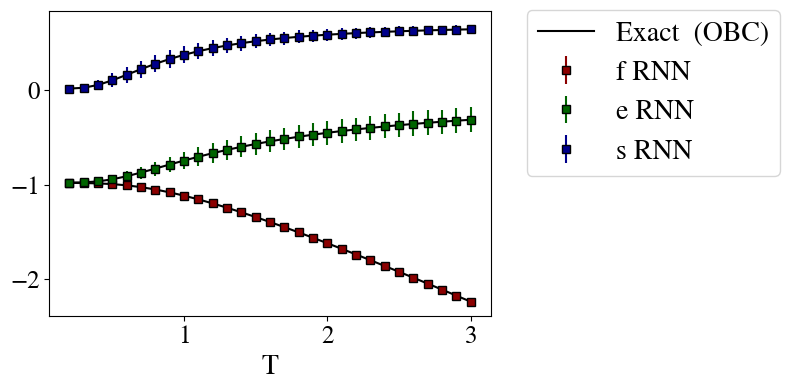

In [5]:
f_analytical = [vna.f_exact(1/T,N_sites) for T in T_list] 
s_analytical = [vna.s_exact(1/T,N_sites) for T in T_list]
e_analytical = [f_analytical[i] + T_list[i] * s_analytical[i] for i in range(len(T_list))]
if (BC ==1):
  BC_text = ' (PBC)'
elif (BC ==0):
  BC_text = ' (OBC)'

fig, ax = plt.subplots(figsize =(8, 4))

# Free energy
if (True):
  label_exact = 'Exact ' + BC_text
  plt.plot(T_list, f_analytical, color = 'black', label = label_exact)
  plt.errorbar(T_list, observables_T[0], observables_T[1], markeredgecolor='black', marker = 's',
               color = 'darkred', ls='none', label = 'f RNN')
# Energy
if (True):
  plt.plot(T_list, e_analytical, color = 'black')
  plt.errorbar(T_list, observables_T[2], observables_T[3], markeredgecolor='black', marker = 's',
               color = 'darkgreen', ls='none', label = 'e RNN')
# Entropy
if (True):
  plt.plot(T_list, s_analytical, color = 'black')
  plt.errorbar(T_list, observables_T[4], observables_T[5], markeredgecolor='black', marker = 's',
               color = 'darkblue', ls='none', label = 's RNN')
  
plt.xlabel('T')
#plt.legend(loc="best")
ax.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig(resultsfolder+'thermo' + BC_text + '.pdf', dpi=128)
plt.show()

# Correlations

In [3]:
%%time
import VNA; importlib.reload(VNA) # to be able to modify f.py and use the new version of the file
from VNA import Annealing
T_list = [3.,2.5,2.,1.5,1.,0.5,.2]
T_list = [1.7,1.6,1.4,1.3]

num_samples = int(1E5)

if (False):
  for T in T_list:
    vna = Annealing(memory_units, activation_function, N_sites, num_samples, Jz, BC)
    avg_corr = vna.correlations(modelsfolder, T)
    if (True):
      file_name = resultsfolder +'corr_T{:.2f}'.format(T)
      np.save(file_name, avg_corr.numpy())

CPU times: user 2h 13min 57s, sys: 11min 46s, total: 2h 25min 44s
Wall time: 49min


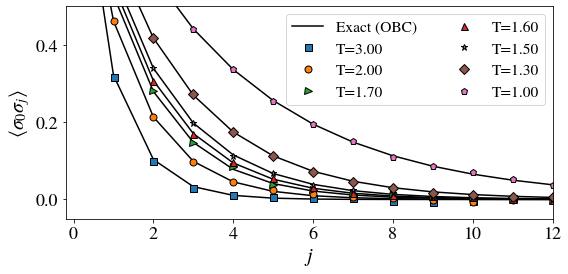

In [69]:
#T_list = [3.,2.5,2.,1.5,1.,0.5,.2]
T_list = [3.,2.,1.7,1.6,1.5,1.3,1.]
import VNA; importlib.reload(VNA) # to be able to modify f.py and use the new version of the file
from VNA import Annealing

num_samples = int(1E5)
vna = Annealing(memory_units, activation_function, N_sites, num_samples, Jz, BC)

colors_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers_list = ['s','o','>','^','*','D','p',"P"]

if (BC ==1):
  BC_text = '(PBC)'
elif (BC ==0):
  BC_text = '(OBC)'

fig, ax = plt.subplots(figsize =(8, 4))
if True:
  for i,T in enumerate(T_list):
    if (i < len(T_list)-1):
        exact_correlations = vna.exact_correlations(T)
        plt.plot(exact_correlations, linestyle = '-', color = 'black')
    else:
      exact_correlations = vna.exact_correlations(T)
      plt.plot(exact_correlations, linestyle = '-', label = 'Exact ' + BC_text, color = 'black')  

for i,T in enumerate(T_list): 
  file_name = resultsfolder +'corr_T{:.2f}'.format(T) + '.npy'
  avg_corr = np.load(file_name)
  plt.plot(avg_corr, marker = markers_list[i], markeredgecolor='black',
           color = colors_list[i], ls='none', label = 'T={:.2f}'.format(T),
           markersize = 7)

plt.ylabel(r'$ \langle \sigma_0 \sigma_j \rangle$')
plt.xlabel(r'$j$')
plt.ylim(-0.05,.5)
plt.xlim(-.2,12)
plt.legend(loc="best",ncol=2, prop={'size': 15.5})
#ax.legend(bbox_to_anchor=(1., .15))
if False:
  plt.savefig(resultsfolder+'correlations' + BC_text + '.pdf', dpi=128, bbox_inches="tight")
#ax.set_yscale('log')

plt.show()

# End of code

In [ ]:
import VNA; importlib.reload(VNA) # to be able to modify f.py and use the new version of the file
from VNA import Annealing

vna = Annealing(input_shape, batch_size, memory_units,
                activation_function, initial_state,
                N_sites, int(3E3), Jz, BC)
T = .3

vna.load_weights(modelsfolder,T)
samples, logprobs = vna.draw_samples()
samples = 2*tf.cast(samples, dtype = tf.float32)-1 # normalization
magnetizations = tf.reduce_sum(samples, axis = 1) / N_sites

fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(magnetizations.numpy(), bins = 'auto')
plt.show()